In [1]:
!pip install scikit-optimize


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("distillation_parameters.csv")

In [4]:
inputs=['Feed_Flow_Rate','Feed_Composition','Reflux_Ratio','Boil_Up_Ratio']
outputs=['Distillate_Purity','Bottoms_Purity','Reboiler_Duty','Condenser_Duty']

In [5]:
X=df[inputs]
y=df[outputs]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=50)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=50)

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
inputs = [[350, 2.5, 100, 2000]]
input_df = pd.DataFrame(inputs, columns=['Feed_Flow_Rate','Feed_Composition','Reflux_Ratio','Boil_Up_Ratio'])
ideal_values = [99.6, 0.04, 1250, 1120]
predicted_outputs = rf_model.predict(input_df)
print(predicted_outputs)

[[9.58174397e-01 8.63276808e-01 2.83099784e+03 2.53843866e+03]]


In [22]:
def objective_function(inputs):
    input_df = pd.DataFrame([inputs], columns=X.columns)
    predicted_outputs = rf_model.predict(input_df).flatten()
    error = sum((predicted_outputs - ideal_values) ** 2)
    return error

bounds = [
    (50, 500),
    (1, 10),
    (0.5, 10.0),
    (0.5,5.0)
]

initial_guess = [200, 5, 2.5, 2]

result = minimize(
    objective_function,
    x0=initial_guess,
    method='Powell',
    bounds=bounds
)

best_inputs = result.x
print("Optimized Inputs:", best_inputs)


Optimized Inputs: [472.06472089   9.53436439   2.66328659   2.19778582]


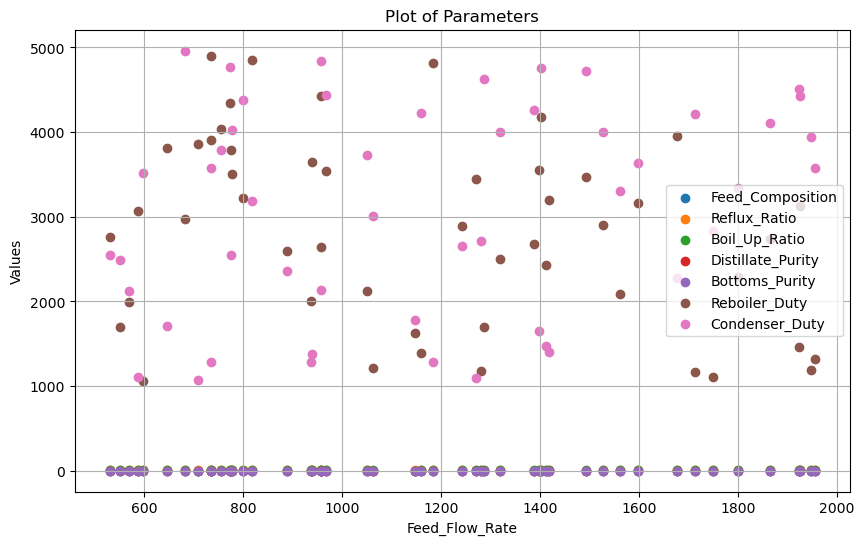

In [30]:
x=df['Feed_Flow_Rate']
y_columns = ['Feed_Composition', 'Reflux_Ratio', 'Boil_Up_Ratio', 'Distillate_Purity', 'Bottoms_Purity', 'Reboiler_Duty', 'Condenser_Duty']
plt.figure(figsize=(10, 6))
for column in y_columns:
    plt.scatter(x, df[column], label=column) 
plt.xlabel('Feed_Flow_Rate') 
plt.ylabel('Values')
plt.title('Plot of Parameters')
plt.legend()
plt.grid(True)

plt.show()